# Candlestick Harami Cross

https://www.investopedia.com/terms/h/haramicross.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2018-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


## Candlestick with Harami Cross

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,10.42,11.02,10.34,10.98,10.98,44146300,True
1,736697.0,11.61,12.14,11.36,11.55,11.55,154066700,False
2,736698.0,12.10,12.43,11.97,12.12,12.12,109503000,True
3,736699.0,12.19,12.22,11.66,11.88,11.88,63808900,False
4,736702.0,12.01,12.30,11.85,12.28,12.28,63346000,True


Text(0, 0.5, 'Price')

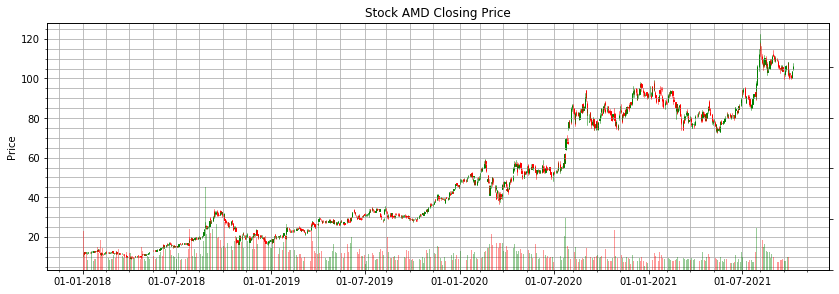

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
harami_cross = talib.CDLHARAMICROSS(df['Open'], df['High'], df['Low'], df['Close'])

harami_cross = harami_cross[harami_cross != 0]

In [6]:
df['harami_cross'] = talib.CDLHARAMICROSS(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['harami_cross'] !=0]

,Open,High,Low,Close,Adj Close,Volume,harami_cross
Date,,,,,,,
2018-02-22,11.820000,12.000000,11.630000,11.840000,11.840000,37886300,100
2018-03-15,11.430000,11.550000,11.190000,11.460000,11.460000,66373900,100
2018-05-31,13.740000,13.930000,13.690000,13.730000,13.730000,46797700,-100
2018-06-22,15.780000,15.910000,15.560000,15.800000,15.800000,59257100,100
2018-12-27,17.430000,17.740000,16.440001,17.490000,17.490000,111373000,-100
2019-04-18,27.600000,27.879999,27.340000,27.680000,27.680000,39880900,100
2019-08-26,30.340000,30.719999,29.940001,30.280001,30.280001,50612500,100
2019-11-20,40.959999,41.750000,40.070000,40.980000,40.980000,79767900,-100
2020-01-13,48.660000,48.860001,48.240002,48.750000,48.750000,34266800,100


In [8]:
df['Adj Close'].loc[df['harami_cross'] !=0]

Date
2018-02-22     11.840000
2018-03-15     11.460000
2018-05-31     13.730000
2018-06-22     15.800000
2018-12-27     17.490000
2019-04-18     27.680000
2019-08-26     30.280001
2019-11-20     40.980000
2020-01-13     48.750000
2020-03-27     46.580002
2020-06-29     50.279999
2020-07-27     68.970001
2020-10-22     79.419998
2020-12-11     91.650002
2020-12-24     91.809998
2021-01-19     89.449997
2021-05-24     77.440002
2021-08-25    108.300003
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['harami_cross'] !=0].index

DatetimeIndex(['2018-02-22', '2018-03-15', '2018-05-31', '2018-06-22',
               '2018-12-27', '2019-04-18', '2019-08-26', '2019-11-20',
               '2020-01-13', '2020-03-27', '2020-06-29', '2020-07-27',
               '2020-10-22', '2020-12-11', '2020-12-24', '2021-01-19',
               '2021-05-24', '2021-08-25'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
harami_cross

Date
2018-02-22    100
2018-03-15    100
2018-05-31   -100
2018-06-22    100
2018-12-27   -100
2019-04-18    100
2019-08-26    100
2019-11-20   -100
2020-01-13    100
2020-03-27   -100
2020-06-29    100
2020-07-27   -100
2020-10-22    100
2020-12-11   -100
2020-12-24    100
2021-01-19    100
2021-05-24    100
2021-08-25    100
dtype: int32

In [11]:
harami_cross.index

DatetimeIndex(['2018-02-22', '2018-03-15', '2018-05-31', '2018-06-22',
               '2018-12-27', '2019-04-18', '2019-08-26', '2019-11-20',
               '2020-01-13', '2020-03-27', '2020-06-29', '2020-07-27',
               '2020-10-22', '2020-12-11', '2020-12-24', '2021-01-19',
               '2021-05-24', '2021-08-25'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,harami_cross
Date,,,,,,,
2018-01-02,10.420000,11.020000,10.340000,10.980000,10.980000,44146300,0
2018-01-03,11.610000,12.140000,11.360000,11.550000,11.550000,154066700,0
2018-01-04,12.100000,12.430000,11.970000,12.120000,12.120000,109503000,0
2018-01-05,12.190000,12.220000,11.660000,11.880000,11.880000,63808900,0
2018-01-08,12.010000,12.300000,11.850000,12.280000,12.280000,63346000,0
...,...,...,...,...,...,...,...
2021-10-01,102.599998,103.000000,100.639999,102.449997,102.449997,41491600,0
2021-10-04,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0
2021-10-05,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0


Text(0, 0.5, 'Price')

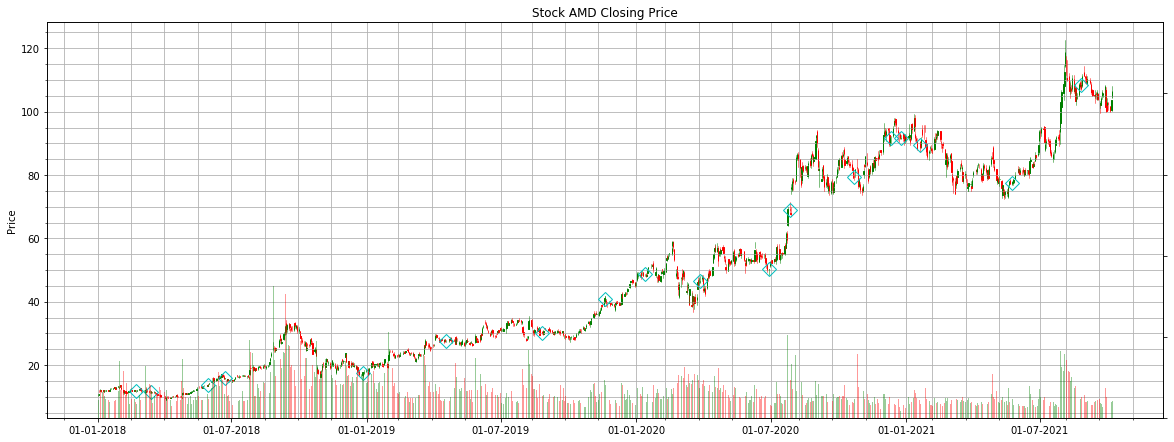

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['harami_cross'] !=0].index, df['Adj Close'].loc[df['harami_cross'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2020-12-01':'2020-12-31']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,harami_cross,VolumePositive
0,737760.0,92.250000,93.900002,90.779999,92.629997,92.629997,58583600,0,True
1,737761.0,92.889999,96.370003,92.529999,93.739998,93.739998,57988800,0,True
2,737762.0,94.059998,94.699997,92.010002,92.309998,92.309998,35859700,0,False
3,737763.0,92.580002,94.580002,90.629997,94.040001,94.040001,45570300,0,True
4,737766.0,94.949997,95.000000,92.970001,94.070000,94.070000,39815700,0,False


Text(0, 0.5, 'Price')

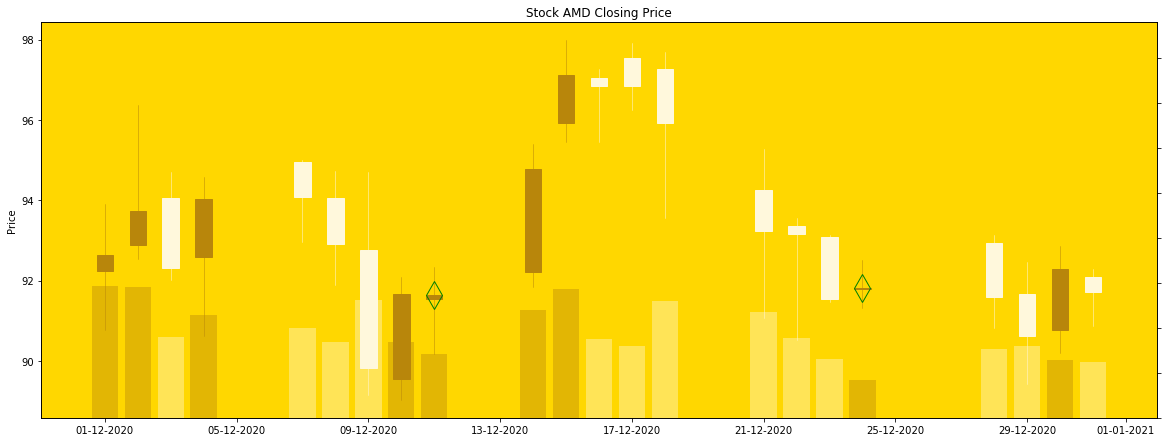

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('gold')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='darkgoldenrod', colordown='cornsilk', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['harami_cross'] !=0].index, df['Adj Close'].loc[df['harami_cross'] !=0],
                'dg', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=20.0) 
colors = dfc.VolumePositive.map({True: 'darkgoldenrod', False: 'cornsilk'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

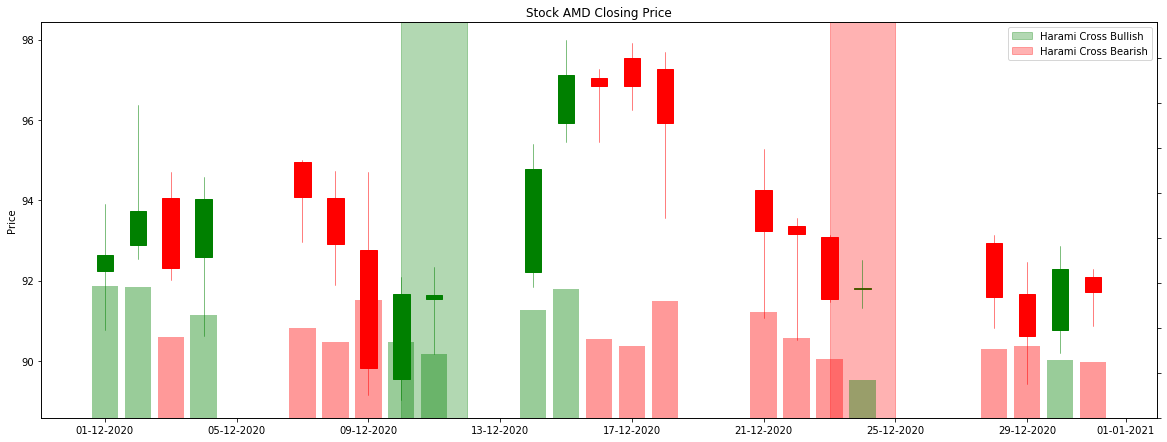

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2020,12,10)), date2num(datetime(2020,12,12)), 
           label="Harami Cross Bullish",color="green", alpha=0.3)
ax.axvspan(date2num(datetime(2020,12,23)), date2num(datetime(2020,12,25)), 
           label="Harami Cross Bearish",color="red", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')